In [2]:
import sys
sys.path.append("..")
%load_ext autoreload

%autoreload 2
import pandas as pd
from misc.config import *
import logging
from models.strategy import *

from experiments import experiment_runner, fit_active_learning, fit_grid

from kaggle_ninja import *

from experiments.utils import *
from experiment_runner import run_experiment

import inspect
from get_data import *
inspect.getsourcelines(run_experiment)
from get_data import _get_raw_data, fingerprints, proteins
from sklearn.decomposition import RandomizedPCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import MDS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2015-05-31 10:34:06,649 - al_ecml2015 - DEBUG - Call get_PCA_of_raw_data


In [4]:
# Has to be agnostic to labels
# Can have different clasa distribution - seems a good idea for active learning
# Finds K clusters and this defines K folds

In [26]:
all_combinations = [p for p in list(product(proteins, fingerprints))]

loader = ["get_splitted_data",
          {"n_folds": 1,
           "seed":777,
           "test_size":0.0}]
preprocess_fncs = [["to_binary", {"all_below": True}]]
data = get_data(all_combinations[0:1], loader, preprocess_fncs, force_reload=True)

2015-05-31 11:38:52,799 - al_ecml2015 - DEBUG - _get_single_data: Cache miss or force reload. Caching _get_single_data_6a5feff77703e470098f417c36962952623a6900305b077f89ec336b2c002b4f
2015-05-31 11:38:52,824 - al_ecml2015 - INFO - Running preprocess on 0 fold
2015-05-31 11:38:53,254 - al_ecml2015 - WARNING - Wasn't able to set write/read flags
2015-05-31 11:38:53,254 - al_ecml2015 - DEBUG - _get_single_data: Saving _get_single_data_6a5feff77703e470098f417c36962952623a6900305b077f89ec336b2c002b4f


In [27]:
data.values()[0]

[[{'X_train': <1043x66 sparse matrix of type '<type 'numpy.float64'>'
   	with 19198 stored elements in Compressed Sparse Row format>,
   'X_valid': array([], shape=(0, 33), dtype=float64),
   'Y_train': array([-1.,  1.,  1., ..., -1.,  1.,  1.]),
   'Y_valid': array([], dtype=float64)}],
 [],
 {'loader': ['get_splitted_data',
   {'compound': '5ht7',
    'fingerprint': 'EstateFP',
    'n_folds': 1,
    'seed': 777,
    'test_size': 0.0}],
  'preprocess': [['to_binary', {'all_below': True}]]}]

2015-05-31 11:49:34,875 - al_ecml2015 - DEBUG - Call calculate_jaccard_distance


In [84]:
preprocess_fncs = preprocess_fncs

In [16]:
print K

[[ 0.]]


2015-05-31 11:51:04,849 - al_ecml2015 - DEBUG - calculate_jaccard_distance: Cache miss or force reload. Caching calculate_jaccard_distance_fae47becf699f4ba7e429c21079cc2d13fc1e6de3c9d44cabc7c5f43455d570b
2015-05-31 11:51:04,853 - al_ecml2015 - DEBUG - _get_single_data:Loading (pickled?) file
2015-05-31 11:51:04,858 - al_ecml2015 - DEBUG - calculate_jaccard_distance: Saving calculate_jaccard_distance_fae47becf699f4ba7e429c21079cc2d13fc1e6de3c9d44cabc7c5f43455d570b
2015-05-31 11:51:04,897 - al_ecml2015 - DEBUG - get_PCA_of_raw_data:Loading (pickled?) file


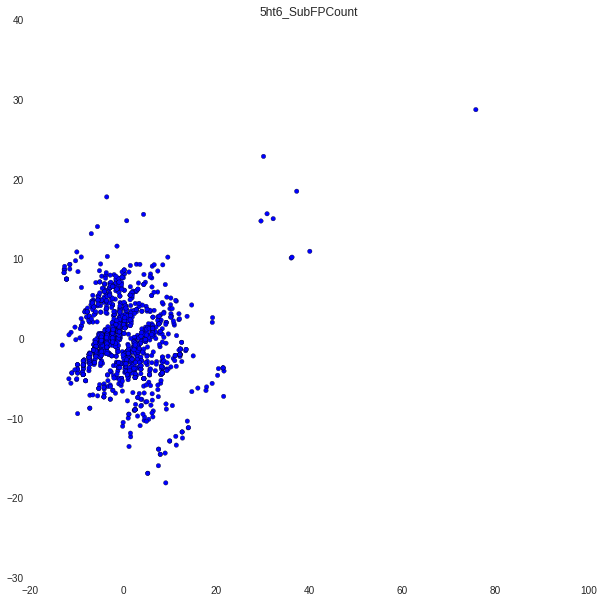

In [14]:
%matplotlib inline

all_combinations = [p for p in list(product(proteins, fingerprints))]

# comps = all_combinations[len(proteins)+fingerprints.index("KlekFP"):len(proteins)+fingerprints.index("KlekFP")+1]
comps = all_combinations[15:16]
fig, axes = plt.subplots(1, 1)
fig.set_figwidth(10*1)
fig.set_figheight(10*1)



if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    preprocess_fncs = [["to_binary", {"all_below": True}]]
    m = DBSCAN(eps=0.01, metric='precomputed')
    
    X, K = calculate_jaccard_distance(force_reload=True, protein=comp[0], fingerprint=comp[1], \
                                               seed=777, preprocess_fncs=preprocess_fncs)
    clusters = m.fit_predict(K)
    
    
    _, Y = _get_raw_data(comp[0], comp[1])

        
    colors = ['rgb'[int(c)] for c in clusters]

    X_pca = get_PCA_of_raw_data(n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', c=colors)
    ax.legend()
# plt.savefig('foo.png')
plt.show()

In [ ]:

all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 # len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[0:fing_to_draw*prot_to_draw]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(10*fing_to_draw)
fig.set_figheight(10*prot_to_draw)


if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    X, Y = _get_raw_data(comp[0], comp[1])
    X_pca = get_PCA_of_raw_data(n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    for c, i, target_name in zip("rgb", [-1, 1], ["inactive", "active"]):
        if i == 0:
            continue
        ax.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], c=c, label=target_name)
    ax.legend()
# plt.savefig('foo.png')
plt.show()

2015-05-31 11:44:56,867 - al_ecml2015 - DEBUG - Call get_PCA_of_raw_data


2015-05-31 12:03:43,384 - al_ecml2015 - DEBUG - Call calculate_jaccard_distance


2015-05-31 12:14:09,945 - al_ecml2015 - DEBUG - Call get_MDS_of_raw_data


In [50]:
get_MDS_of_raw_data(n_components=2, protein="5ht6", fingerprint="KlekFP", seed=777, preprocess_fncs=preprocess_fncs)

2015-05-31 12:09:31,273 - al_ecml2015 - DEBUG - get_MDS_of_raw_data:Loading (pickled?) file


array([[-0.23011561, -0.32531113],
       [ 0.5364917 ,  0.02415299],
       [ 0.29765542, -0.36849849],
       ..., 
       [-0.2244875 ,  0.46343223],
       [-0.10765319, -0.54070433],
       [-0.32012029,  0.05106225]])

In [42]:
loader = ["get_splitted_data",
          {"n_folds": 1,
           "seed":777,
           "test_size":0.0}]
data = get_data([["5ht6", "KlekFP"]], loader, preprocess_fncs)
data["5ht6_KlekFP"][0][0]

2015-05-31 12:06:37,523 - al_ecml2015 - DEBUG - _get_single_data:Loading (pickled?) file


{'X_train': <1831x2502 sparse matrix of type '<type 'numpy.float64'>'
 	with 177996 stored elements in Compressed Sparse Row format>,
 'X_valid': array([], shape=(0, 1251), dtype=float64),
 'Y_train': array([ 1., -1.,  1., ..., -1.,  1.,  1.]),
 'Y_valid': array([], dtype=float64)}

In [46]:
calculate_jaccard_distance(protein="5ht6", fingerprint="KlekFP", seed=777, preprocess_fncs=preprocess_fncs)

2015-05-31 12:06:55,126 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


(<1831x2502 sparse matrix of type '<type 'numpy.float64'>'
 	with 177996 stored elements in Compressed Sparse Row format>,
 array([[ 0.        ,  0.88      ,  0.8       , ...,  0.61052632,
          0.56976744,  0.66233766],
        [ 0.88      ,  0.        ,  0.71428571, ...,  0.90322581,
          0.89285714,  0.74137931],
        [ 0.8       ,  0.71428571,  0.        , ...,  0.84090909,
          0.80769231,  0.74137931],
        ..., 
        [ 0.61052632,  0.90322581,  0.84090909, ...,  0.        ,
          0.71818182,  0.72631579],
        [ 0.56976744,  0.89285714,  0.80769231, ...,  0.71818182,
          0.        ,  0.7826087 ],
        [ 0.66233766,  0.74137931,  0.74137931, ...,  0.72631579,
          0.7826087 ,  0.        ]]))

In [ ]:
preprocess_fncs(n_componen)

In [54]:
%matplotlib qt

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
fingerprints

['EstateFP',
 'ExtFP',
 'KlekFP',
 'KlekFPCount',
 'MACCSFP',
 'PubchemFP',
 'SubFP',
 'SubFPCount']

In [40]:
K[0,:]

array([ 0.        ,  0.4       ,  0.43373494, ...,  0.3375    ,
        0.21794872,  0.46511628])

In [103]:
protein = "5ht6"
fingerprint = "MACCSFP"
seed = 777
preprocess_fncs = preprocess_fncs
X, K = calculate_jaccard_distance(protein=protein, fingerprint=fingerprint, \
                                  seed=seed, preprocess_fncs=preprocess_fncs, only_positive=False)
print K.shape
print X.shape

m = AgglomerativeClustering(n_clusters=2, \
                            memory="/home/moje/Projekty_big/AL_ECML15/tmp2", 
                            linkage='complete',  
                            affinity="precomputed")


clusters = m.fit_predict(1-K)

2015-05-31 16:29:26,620 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


(1831, 1831)
(1831, 294)


In [104]:
id_to_nodes = {i: [i] for i in range(K.shape[0])}
check_threshold = int(0.1 * K.shape[0])

In [ ]:
import graphviz as gv
g = gv.Graph(format='svg')
for i in range(K.shape[0]):
    g.node(str(i))
# Nodes in m.children_ are sorted by merging time
for id, n in enumerate(m.children_):
    g.node(str(id + K.shape[0]))
    g.edge(str(id + K.shape[0]), str(n[0]))
    g.edge(str(id + K.shape[0]), str(n[1]))
    id_to_nodes[id  + K.shape[0]] = id_to_nodes[n[0]] + id_to_nodes[n[1]]
g.render("clustering")

In [42]:
np.where(clusters==0)

(array([   0,    1,    2, ..., 1828, 1829, 1830]),)

In [10]:
@cached()
def get_PCA_of_raw_data(n_components, iterated_power, protein, fingerprint):
    X, Y = _get_raw_data(protein, fingerprint)
    X = X[Y==1]
    model = RandomizedPCA(n_components=n_components,iterated_power=iterated_power).fit(X.toarray(), Y)
    return model.transform(X.toarray())

@cached()
def calculate_jaccard_distance(protein, fingerprint, seed, preprocess_fncs, only_positive=False):
    loader = ["get_splitted_data",
              {"n_folds": 1,
               "seed":seed,
               "test_size":0.0}]
    data = get_data([[protein, fingerprint]], loader, preprocess_fncs)
    Y = data[protein+"_"+fingerprint][0][0]["Y_train"]
    X1T = data[protein+"_"+fingerprint][0][0]["X_train"]
    if only_positive:
        X1T = X1T[Y==1]
    X2T = X1T
    X1T_sums = np.array(X1T.sum(axis=1))
    X2T_sums = np.array(X2T.sum(axis=1))
    K = X1T.dot(X2T.T)
    K = K.toarray()
    K2 = -(K.copy())
    K2 += (X1T_sums.reshape(-1,1))
    K2 += (X2T_sums.reshape(1,-1))
    K = K/K2
    return X1T, 1 - K

@cached()
def get_MDS_of_raw_data(n_components,  protein, fingerprint, seed, preprocess_fncs, only_positive=False):
    X, K = calculate_jaccard_distance(protein=protein, fingerprint=fingerprint, \
                                      seed=seed, preprocess_fncs=preprocess_fncs, only_positive=only_positive)
    print K.shape
    print X.shape
    m = MDS(n_components=n_components, n_jobs=4, dissimilarity="precomputed")
    return m, m.fit_transform(K)

2015-05-31 13:45:10,108 - al_ecml2015 - DEBUG - Call get_PCA_of_raw_data
2015-05-31 13:45:10,110 - al_ecml2015 - DEBUG - Call calculate_jaccard_distance
2015-05-31 13:45:10,111 - al_ecml2015 - DEBUG - Call get_MDS_of_raw_data


In [ ]:
%matplotlib inline

In [9]:
import seaborn
all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 #len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[len(fingerprints): len(fingerprints)*2]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(20*fing_to_draw)
fig.set_figheight(20*prot_to_draw)
preprocess_fncs = [['to_binary', {'all_below': True}]]


if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    print comp
#     X, Y = _get_raw_data(comp[0], comp[1])
    X_mds = get_MDS_of_raw_data(n_components=2, seed=777, protein=comp[0], \
                                fingerprint=comp[1], preprocess_fncs=preprocess_fncs, only_positive=True)
#     X_mds = get_PCA_of_raw_data(force_reload=True, \
#                                 n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])  
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_mds[:, 0], X_mds[:, 1])
    ax.legend()
plt.savefig('pca_5ht6_one_class_2_comp.png')
#plt.show()

2015-05-31 13:19:14,157 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_ee487cd4db6af38ca1d9d041f5ac6f2255db1b344957122a4ec1ede40438ab53
2015-05-31 13:19:14,158 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'EstateFP')
(1490, 1490)
(1490, 68)


2015-05-31 13:20:02,002 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_ee487cd4db6af38ca1d9d041f5ac6f2255db1b344957122a4ec1ede40438ab53
2015-05-31 13:20:02,041 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_7ca7337cae71b96d713476784c2336aa49d5d03f06f7769c5afb5caa32811d84
2015-05-31 13:20:02,042 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'ExtFP')
(1490, 1490)
(1490, 2012)


2015-05-31 13:20:54,680 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_7ca7337cae71b96d713476784c2336aa49d5d03f06f7769c5afb5caa32811d84
2015-05-31 13:20:54,702 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_73c21cdb64948caaec508c0d1ed37b034f8758facb016020c16bfe45ad50fd20
2015-05-31 13:20:54,703 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'KlekFP')
(1490, 1490)
(1490, 2502)


2015-05-31 13:21:48,348 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_73c21cdb64948caaec508c0d1ed37b034f8758facb016020c16bfe45ad50fd20
2015-05-31 13:21:48,378 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_a3a3296a8819ce629225f06a83fdf4bfd0f327b3329baa0cfd93f638056132dc
2015-05-31 13:21:48,380 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'KlekFPCount')
(1490, 1490)
(1490, 4429)


2015-05-31 13:22:42,403 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_a3a3296a8819ce629225f06a83fdf4bfd0f327b3329baa0cfd93f638056132dc
2015-05-31 13:22:42,439 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_580ec0c3091076e2d36311d8cb5cb72ac4d5a33fbcb2ecc373b17580178ff4f2
2015-05-31 13:22:42,440 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'MACCSFP')
(1490, 1490)
(1490, 294)


2015-05-31 13:23:35,011 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_580ec0c3091076e2d36311d8cb5cb72ac4d5a33fbcb2ecc373b17580178ff4f2
2015-05-31 13:23:35,029 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_e46c39af64067e215af06da9a176e28836ed8d4952ab6fae08fca724b36f08b0
2015-05-31 13:23:35,030 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'PubchemFP')
(1490, 1490)
(1490, 1172)


2015-05-31 13:24:22,242 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_e46c39af64067e215af06da9a176e28836ed8d4952ab6fae08fca724b36f08b0
2015-05-31 13:24:22,264 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_c3202dfb1b4963f352fc803a545cfdc565ae16009475e91dc41335628913f52e
2015-05-31 13:24:22,265 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'SubFP')
(1490, 1490)
(1490, 218)


2015-05-31 13:25:12,580 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_c3202dfb1b4963f352fc803a545cfdc565ae16009475e91dc41335628913f52e
2015-05-31 13:25:12,613 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_4dc7fec6a19c60c6e9d0e2e7cd289449670a80a75d90d3c261f73821a48b64c5
2015-05-31 13:25:12,615 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'SubFPCount')
(1, 1)
(1, 108)


2015-05-31 13:25:12,956 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_4dc7fec6a19c60c6e9d0e2e7cd289449670a80a75d90d3c261f73821a48b64c5


In [2]:
import seaborn
all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 #len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[0:fing_to_draw*prot_to_draw]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(10*fing_to_draw)
fig.set_figheight(10*prot_to_draw)

if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    X, Y = _get_raw_data(comp[0], comp[1])
    X = X[Y==1] # Pick only positive
    X_pca = get_PCA_of_raw_data(force_reload=True, \
                                n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_pca[:, 0], X_pca[:, 1])
    ax.legend()
plt.savefig('foo.png')
# plt.show()

NameError: name 'get_PCA_of_raw_data' is not defined

In [ ]:
get_best(grid_results_random.experiments, metric="mean_mcc_valid").results['mean_mcc_valid']

In [ ]:
get_best(grid_results_uncert.experiments, metric="mean_mcc_valid").results['mean_mcc_valid']

In [ ]:
import sklearn